<a href="https://colab.research.google.com/github/rakib06/AI/blob/master/Exercise2_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## Exercise 2
In the course you learned how to do classification using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it? 

In [1]:
# YOUR CODE SHOULD START HERE
# YOUR CODE SHOULD END HERE
import tensorflow as tf
#from tensorflow import keras
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()



11493376/11490434 [==============================] - 0s 0us/step


"\n# YOUR CODE SHOULD END HERE\nmodel = tf.keras.models.Sequential([tf.keras.layers.Flatten(),\n                                    tf.keras.layers.Dense(1024, activation=tf.)\n# YOUR CODE SHOULD START HERE\n    \n# YOUR CODE SHOULD END HERE\n])\n\nmodel.compile(optimizer='adam',\n              loss='sparse_categorical_crossentropy',\n              metrics=['accuracy'])\n\n# YOUR CODE SHOULD START HERE\n# YOUR CODE SHOULD END HERE\n"

In [4]:
print(len(y_train))

60000


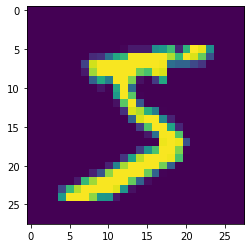

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])



In [8]:


x_train  = x_train / 255.0
x_test = x_test / 255.0

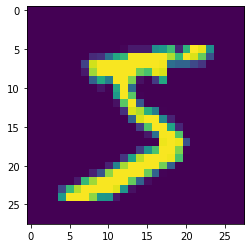

In [9]:
plt.imshow(x_train[0])

In [12]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.99 ):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True
      

In [16]:
callbacks = myCallback()

In [18]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2591 - accuracy: 0.9255
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1118 - accuracy: 0.9667
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0775 - accuracy: 0.9768
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0582 - accuracy: 0.9819
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0450 - accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0349 - accuracy: 0.9893
Epoch 7/10
1858/1875 [============================>.] - ETA: 0s - loss: 0.0283 - accuracy: 0.9910
Reached 99% accuracy so cancelling training!
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0282 - accuracy: 0.9910


Prediction:  3  >---->  99.90960359573364 %
Real Value:  3
[6.7055363e-14 1.7871594e-07 1.0416692e-08 9.9909604e-01 4.5820027e-08
 9.0362469e-04 5.6597498e-14 2.0959838e-10 3.2444925e-09 1.4472678e-07]


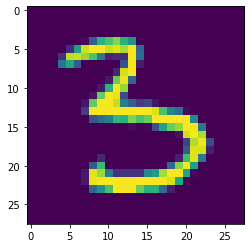

In [27]:
classifications = model.predict(x_test)
test_image_index = 313
max_index = list(classifications[test_image_index]).index(max(classifications[test_image_index]))
print('Prediction: ',max_index, ' >----> ', max(classifications[test_image_index])*100 , '%')
print('Real Value: ',y_test[test_image_index])
print(classifications[test_image_index])
plt.imshow(x_test[test_image_index])

In [22]:
model.evaluate(x_test, y_test)


313/313 [==============================] - 0s 1ms/step - loss: 0.0751 - accuracy: 0.9793


[0.07512591034173965, 0.9793000221252441]